# Libraries Import

In [143]:
import pandas as pd
import os
import numpy as np
import os
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter


# Data Loading 

In [144]:


# Define the directory where the data files are stored
data_dir = "/kaggle/input/crop-dataset"

# Create a function to load and process the data for a given year
def load_and_process_data(year, data_dir):
    # Initialize an empty dataframe to store the data for the specific year
    data = pd.DataFrame()

    # Get the list of files for the specified year
    year_folder = str(year)

    files = os.listdir(os.path.join(data_dir, year_folder))
    
    # Load data from each file in the folder
    for filename in files:
        if filename.endswith(".csv"):
            # Read the CSV file
            df = pd.read_csv(os.path.join(data_dir, year_folder, filename))
            
            # Add 'Year' and 'CropType' to the dataframe
            base_name = filename.split('.')[0]
            croptype = base_name.rsplit('202', 1)[0]  # Assuming the 'CropType' is before '202'
            df['Year'] = year
            df['CropType'] = croptype
            
            # Append to the main dataframe
            data = pd.concat([data, df], ignore_index=True)
    

    return data



In [145]:
# Process data for 2021, 2022, and 2023
data_2021 = load_and_process_data(2021, data_dir)

data_2022 = load_and_process_data(2022, data_dir)

data_2023 = load_and_process_data(2023, data_dir)


print("Data processing complete")

Data processing complete


# Printing each year dataset

















In [146]:
data_2021.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,rice
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,rice
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,rice
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,rice
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,rice


In [147]:
data_2022.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.442943,0.325107,0.448911,0.698456,1.000000,0.071374,0.714939,0.588107,0.571895,0.787698,0.816302,0.613884,2022,rice
1,0.128122,0.352554,0.533025,0.647528,1.000000,0.052378,0.534581,0.511706,0.562397,0.275249,0.553359,0.565554,2022,rice
2,0.400911,0.406091,0.443299,0.535024,0.978224,0.073414,0.387755,0.484515,0.605432,0.570827,0.636029,0.553675,2022,rice
3,0.390117,0.728009,0.760038,0.786063,1.000000,0.059971,0.555362,0.699239,0.893971,0.942492,0.869822,0.759206,2022,rice
4,0.117680,0.111500,0.102671,0.126739,0.144219,0.077910,0.204507,0.600983,0.762850,0.838978,0.824411,0.738954,2022,rice


In [148]:
data_2023.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.112304,0.168831,0.357419,0.652470,0.511220,0.071754,0.746601,0.714075,0.747262,0.729675,0.634746,0.199640,2023,cotton
1,0.111033,0.149460,0.360941,0.404814,0.385993,0.089474,0.647436,0.637131,0.677606,0.663667,0.581217,0.438363,2023,cotton
2,0.102703,0.226310,0.554877,0.790602,0.812145,0.090364,0.866772,0.787777,0.838983,0.784251,0.711433,0.869757,2023,cotton
3,0.090742,0.079962,0.355833,0.864751,0.837066,0.149301,0.890619,0.795135,0.834237,0.774393,0.683996,0.840936,2023,cotton
4,0.100312,0.077954,0.328019,0.697031,0.722988,0.242764,0.869281,0.811822,0.836173,0.802686,0.700463,0.848245,2023,cotton


# Encoding Values

In [149]:

def encode_values(data):
    data = pd.get_dummies(data,columns=['CropType'], drop_first=True)
    data["CropType_rice"]=data["CropType_rice"].astype(int)
    return data
    

In [150]:
data_2021=encode_values(data_2021)
data_2022=encode_values(data_2022)
data_2023=encode_values(data_2023)

# Checking Class Balance

In [151]:
class_balance = data_2021["CropType_rice"].value_counts()

class_balance

CropType_rice
0    2883
1     419
Name: count, dtype: int64

In [152]:
class_balance = data_2022["CropType_rice"].value_counts()

class_balance

CropType_rice
0    12411
1     4687
Name: count, dtype: int64

In [153]:
class_balance = data_2023["CropType_rice"].value_counts()

class_balance

CropType_rice
0    11777
1      919
Name: count, dtype: int64

# Mitigating Imbalance

In [154]:
from imblearn.over_sampling import SMOTENC


def apply_smote_nc(data, target_column, categorical_columns, random_state=42):
    """
    Applies SMOTENC to balance a dataset with a mix of numerical and categorical features.

    Parameters:
        data (pd.DataFrame): The input dataset.
        target_column (str): The name of the target column to balance.
        categorical_columns (list of str): The list of categorical column names.
        random_state (int): The random state for reproducibility.

    Returns:
        pd.DataFrame: A new DataFrame with balanced classes in the target column.
    """
    # Separate features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Identify categorical column indices
    categorical_features = [X.columns.get_loc(col) for col in categorical_columns]

    # Apply SMOTENC
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=random_state)
    X_smote, y_smote = smote_nc.fit_resample(X, y)

    # Combine features and target into a new DataFrame
    smote_data = pd.DataFrame(X_smote, columns=X.columns)
    smote_data[target_column] = y_smote

    return smote_data




In [155]:

smote_data_2021 = apply_smote_nc(data_2021, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2022 = apply_smote_nc(data_2022, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2023 = apply_smote_nc(data_2023, target_column="CropType_rice", categorical_columns=["Year"])


# Checking Class Balance

In [156]:
class_balance = smote_data_2021["CropType_rice"].value_counts()

class_balance

CropType_rice
1    2883
0    2883
Name: count, dtype: int64

In [157]:
class_balance = smote_data_2022["CropType_rice"].value_counts()

class_balance

CropType_rice
1    12411
0    12411
Name: count, dtype: int64

In [158]:
class_balance = smote_data_2023["CropType_rice"].value_counts()

class_balance

CropType_rice
0    11777
1    11777
Name: count, dtype: int64

# Combining The dataset

In [159]:
data_train = pd.concat([smote_data_2021, smote_data_2022, smote_data_2023], ignore_index=True)

In [160]:
data_train.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


In [161]:
class_balance = data_train["CropType_rice"].value_counts()

class_balance

CropType_rice
1    27071
0    27071
Name: count, dtype: int64

# Combining Dataset For testing 

In [162]:
data_test = pd.concat([data_2021, data_2022, data_2023], ignore_index=True)

In [163]:
data_test.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.098886,0.103672,0.238722,0.478474,0.429209,0.281007,0.605667,0.291368,0.133020,0.779261,0.818019,0.721222,2021,1
1,0.118790,0.147110,0.218349,0.652877,0.513883,0.039530,0.702403,0.646029,0.162462,0.204209,0.363850,0.155452,2021,1
2,0.181040,0.146681,0.227818,0.528602,0.413309,0.041322,0.671362,0.679732,0.602896,0.199579,0.373932,0.143989,2021,1
3,0.220000,0.143860,0.197724,0.676182,0.534545,0.054701,0.706315,0.636900,0.216295,0.216854,0.239008,0.171939,2021,1
4,0.113367,0.139415,0.411447,0.637250,0.466728,0.045908,0.691222,0.654271,0.589966,0.208658,0.211051,0.161702,2021,1


# Outliers Removal

In [164]:
import pandas as pd
import numpy as np



def remove_outliers_zscore(df, threshold=3):
    """
    Remove outliers from a DataFrame using the Z-Score method.
    Rows with Z-Score > threshold (default=3) are considered outliers.
    """
    # Calculate Z-Score for each column
    z_scores = (df - df.mean()) / df.std()
    
    # Keep rows where all Z-Scores are within the threshold
    cleaned_df = df[(np.abs(z_scores) <= threshold).all(axis=1)]
    return cleaned_df

# Remove outliers using Z-Score method
cleaned_data = remove_outliers_zscore(data_train, threshold=3)

# Display results
print("Original Dataset Shape:", data_train.shape)
print("Cleaned Dataset Shape (without outliers):", cleaned_data.shape)

# Save the cleaned data if needed
# cleaned_data.to_csv("cleaned_data.csv", index=False)

Original Dataset Shape: (54142, 14)
Cleaned Dataset Shape (without outliers): (51409, 14)


# Scaling Train Dataset

In [165]:

from sklearn.preprocessing import StandardScaler

def apply_standard_scaling(df, exclude_columns=["CropType_rice", "Year"]):
    """
    Function to apply standard scaling on all numerical columns in the dataframe.
    
    Args:
    - df: DataFrame with features to be scaled.
    - exclude_columns: List of columns to exclude from scaling (e.g., target column or categorical columns).
    
    Returns:
    - Scaled DataFrame with the same columns, excluding the ones from exclude_columns.
    """
    # Identify columns to scale (exclude target and categorical columns)
    columns_to_scale = [col for col in df.columns if col not in exclude_columns]
    
    # Apply StandardScaler to these columns
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_scaled["Year"]=df["Year"]
    df_scaled["CropType_rice"]=df["CropType_rice"]
    
    return df_scaled


In [166]:
data_train=apply_standard_scaling(cleaned_data)
data_train.to_csv("/kaggle/working/data_train.csv", index=False)


In [167]:
data_train.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,-0.595046,-0.665135,-0.441346,0.027857,-0.608422,-0.061703,-0.023856,-1.533778,-2.752189,0.472899,0.888844,0.674736,2021,1
1,-0.403889,-0.384437,-0.526695,0.673684,-0.311254,-0.926497,0.378594,0.208209,-2.604412,-2.371283,-1.272619,-1.773726,2021,1
2,0.193943,-0.387211,-0.487027,0.213484,-0.664225,-0.920076,0.249453,0.373751,-0.393736,-2.394182,-1.224637,-1.823334,2021,1
3,0.568110,-0.405442,-0.613097,0.759984,-0.238737,-0.872162,0.394872,0.163370,-2.334208,-2.308740,-1.866759,-1.702375,2021,1
4,-0.455974,-0.434165,0.282248,0.615815,-0.476748,-0.903653,0.332079,0.248692,-0.458633,-2.349278,-1.999810,-1.746679,2021,1


# Scaling Test Data

In [168]:
data_test=apply_standard_scaling(data_test)

In [169]:
data_test.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,-0.495931,-0.560094,-0.220476,0.349885,-0.590946,-0.032690,-0.155118,-1.871028,-3.087297,0.650092,1.248438,0.941603,2021,1
1,-0.356550,-0.236026,-0.337168,1.166486,-0.261305,-0.900079,0.252758,-0.008189,-2.923023,-2.458856,-1.158665,-1.632256,2021,1
2,0.079358,-0.239229,-0.282931,0.584598,-0.652847,-0.893639,0.121876,0.168838,-0.465574,-2.483887,-1.105231,-1.684405,2021,1
3,0.352182,-0.260277,-0.455299,1.275606,-0.180865,-0.845581,0.269256,-0.056138,-2.622657,-2.390490,-1.820327,-1.557251,2021,1
4,-0.394527,-0.293438,0.768846,1.093315,-0.444884,-0.877167,0.205616,0.035103,-0.537714,-2.434803,-1.968499,-1.603824,2021,1


# Applying Machine Learning Models

# General function of cross validation

In [170]:
from sklearn.metrics import (
    accuracy_score, classification_report, precision_score, 
    recall_score, f1_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

def model_report(data_train, data_test, model):
    """
    Perform cross-validation with the specified model using training and testing data.
    
    Parameters:
        data_train (pd.DataFrame): Training dataset.
        data_test (pd.DataFrame): Testing dataset.
        model: A scikit-learn model to be trained and evaluated.

    Returns:
        None. Prints accuracy, classification reports, confusion matrices, and overall metrics.
    """
    # Lists to store results for overall metrics
    all_y_true = []  # True labels across all folds
    all_y_pred = []  # Predicted labels across all folds

    # Loop through the train-test splits (Year 1 & 2 vs Year 3, etc.)
    for train_years, test_year in [([2021, 2022], 2023), ([2021, 2023], 2022), ([2022, 2023], 2021)]:
        # Train and test data for the current split
        train_data = data_train[data_train['Year'].isin(train_years)]
        test_data = data_test[data_test['Year'] == test_year]
        
        # Prepare features and labels
        X_train = train_data.drop(['CropType_rice', 'Year'], axis=1)
        y_train = train_data['CropType_rice']
        X_test = test_data.drop(['CropType_rice', 'Year'], axis=1)
        y_test = test_data['CropType_rice']

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nAccuracy (Train: Years {train_years}, Test: Year {test_year}): {accuracy:.4f}")
        print(f"Classification Report (Train: Years {train_years}, Test: Year {test_year}):\n")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f"Confusion Matrix (Train: Years {train_years}, Test: Year {test_year})")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

        # Append results to lists for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    # Calculate overall metrics
    overall_accuracy = accuracy_score(all_y_true, all_y_pred)
    overall_precision = precision_score(all_y_true, all_y_pred, average='weighted')
    overall_recall = recall_score(all_y_true, all_y_pred, average='weighted')
    overall_f1 = f1_score(all_y_true, all_y_pred, average='weighted')

    print("\nOverall Metrics:")
    print(f"Overall Accuracy: {overall_accuracy:.4f}")
    print(f"Overall Precision: {overall_precision:.4f}")
    print(f"Overall Recall: {overall_recall:.4f}")
    print(f"Overall F1-Score: {overall_f1:.4f}")


# Ensamble Method(XGBOOST)


In [171]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=10)





Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.7431
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     11777
           1       0.20      0.86      0.33       919

    accuracy                           0.74     12696
   macro avg       0.59      0.80      0.58     12696
weighted avg       0.93      0.74      0.80     12696



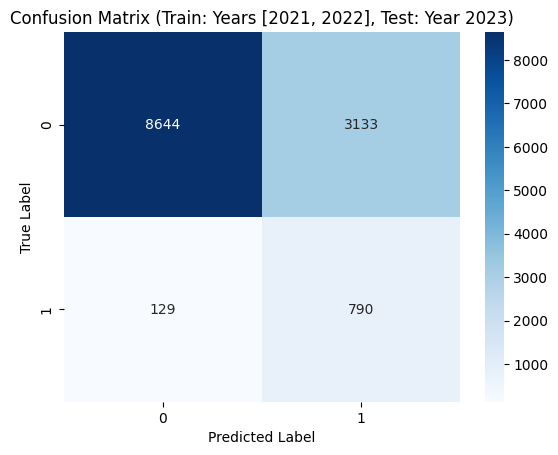


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8599
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12411
           1       0.83      0.61      0.70      4687

    accuracy                           0.86     17098
   macro avg       0.85      0.78      0.81     17098
weighted avg       0.86      0.86      0.85     17098



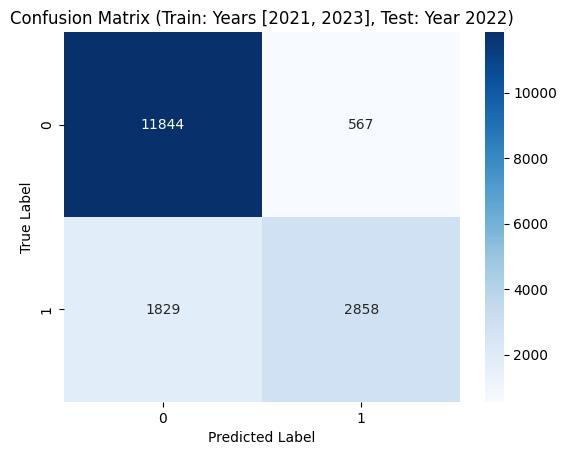


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.7162
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2883
           1       0.27      0.71      0.39       419

    accuracy                           0.72      3302
   macro avg       0.61      0.71      0.60      3302
weighted avg       0.86      0.72      0.76      3302



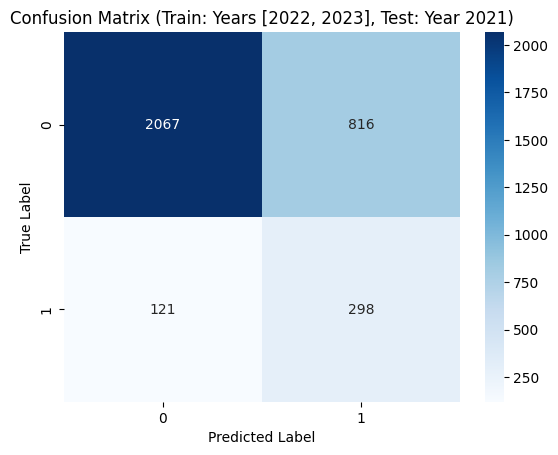


Overall Metrics:
Overall Accuracy: 0.8007
Overall Precision: 0.8338
Overall Recall: 0.8007
Overall F1-Score: 0.8128


In [172]:


model_report(data_train,data_test, xgb_model)

# Bagging

In [173]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base learner (Decision Tree Classifier)
base_model = DecisionTreeClassifier(max_depth=5)
bagging_model = BaggingClassifier(estimator=base_model,
                                 n_estimators=50,  
                                 random_state=42)


Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.8036
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     11777
           1       0.26      0.92      0.40       919

    accuracy                           0.80     12696
   macro avg       0.63      0.86      0.64     12696
weighted avg       0.94      0.80      0.85     12696



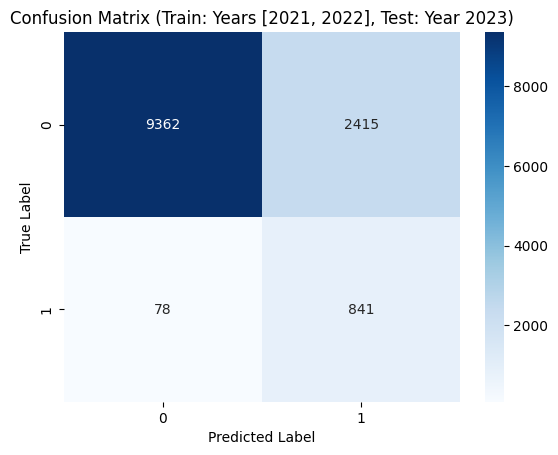


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8675
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12411
           1       0.76      0.76      0.76      4687

    accuracy                           0.87     17098
   macro avg       0.83      0.83      0.83     17098
weighted avg       0.87      0.87      0.87     17098



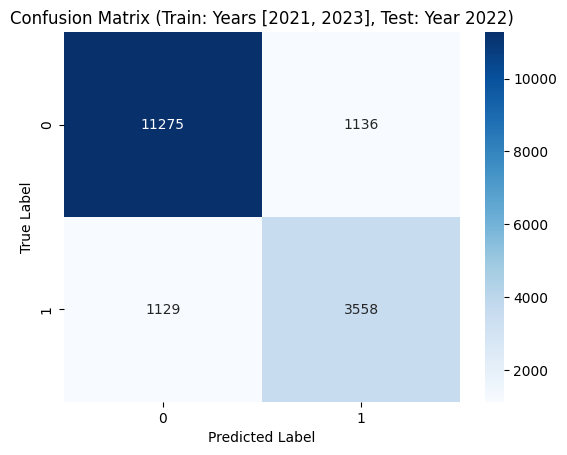


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.6260
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      2883
           1       0.20      0.68      0.31       419

    accuracy                           0.63      3302
   macro avg       0.57      0.65      0.53      3302
weighted avg       0.84      0.63      0.69      3302



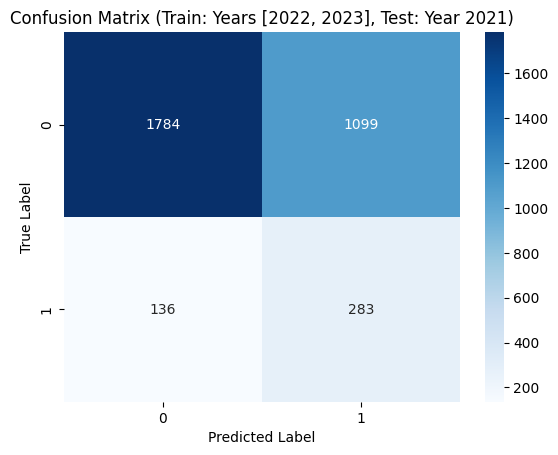


Overall Metrics:
Overall Accuracy: 0.8189
Overall Precision: 0.8631
Overall Recall: 0.8189
Overall F1-Score: 0.8325


In [174]:
model_report(data_train,data_test, bagging_model)

# Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)



Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.7401
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     11777
           1       0.20      0.88      0.33       919

    accuracy                           0.74     12696
   macro avg       0.60      0.81      0.58     12696
weighted avg       0.93      0.74      0.80     12696



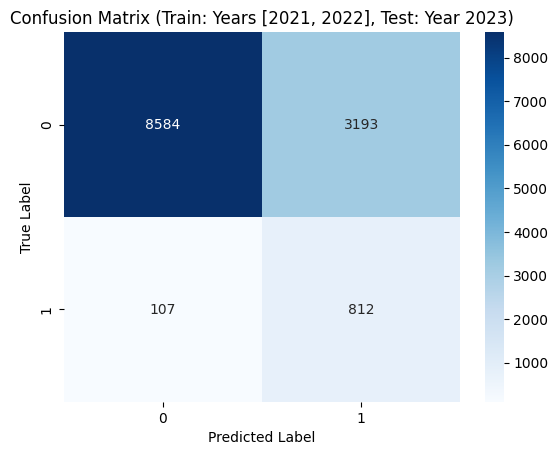


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8748
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     12411
           1       0.86      0.64      0.74      4687

    accuracy                           0.87     17098
   macro avg       0.87      0.80      0.83     17098
weighted avg       0.87      0.87      0.87     17098



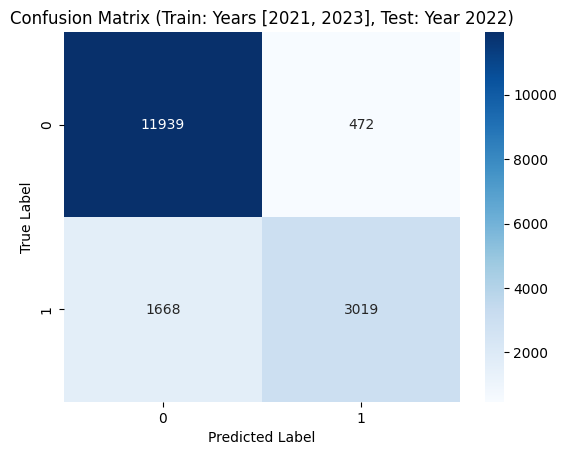


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.6523
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.93      0.65      0.77      2883
           1       0.22      0.67      0.33       419

    accuracy                           0.65      3302
   macro avg       0.57      0.66      0.55      3302
weighted avg       0.84      0.65      0.71      3302



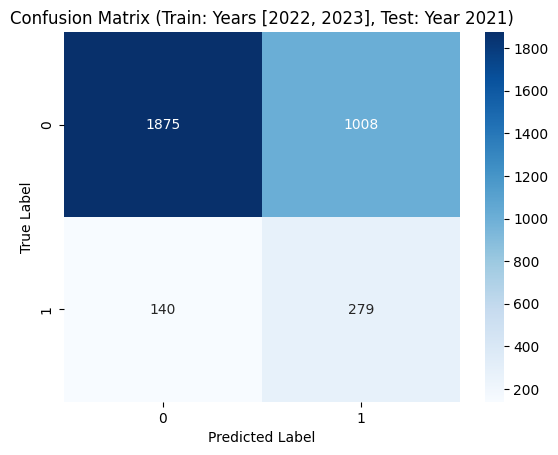


Overall Metrics:
Overall Accuracy: 0.8009
Overall Precision: 0.8387
Overall Recall: 0.8009
Overall F1-Score: 0.8141


In [176]:
model_report(data_train,data_test,rf_model)

# SVM

In [177]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


Accuracy (Train: Years [2021, 2022], Test: Year 2023): 0.6555
Classification Report (Train: Years [2021, 2022], Test: Year 2023):

              precision    recall  f1-score   support

           0       0.99      0.64      0.77     11777
           1       0.16      0.88      0.27       919

    accuracy                           0.66     12696
   macro avg       0.57      0.76      0.52     12696
weighted avg       0.93      0.66      0.74     12696



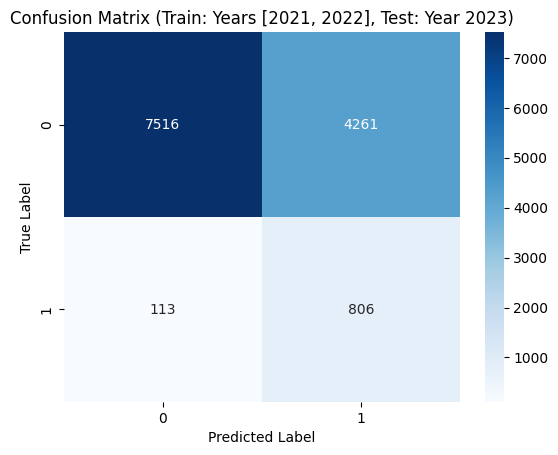


Accuracy (Train: Years [2021, 2023], Test: Year 2022): 0.8649
Classification Report (Train: Years [2021, 2023], Test: Year 2022):

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     12411
           1       0.75      0.77      0.76      4687

    accuracy                           0.86     17098
   macro avg       0.83      0.83      0.83     17098
weighted avg       0.87      0.86      0.87     17098



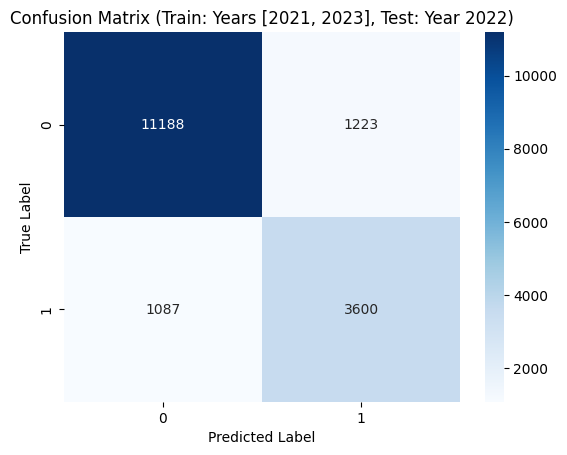


Accuracy (Train: Years [2022, 2023], Test: Year 2021): 0.6381
Classification Report (Train: Years [2022, 2023], Test: Year 2021):

              precision    recall  f1-score   support

           0       0.95      0.61      0.75      2883
           1       0.23      0.80      0.36       419

    accuracy                           0.64      3302
   macro avg       0.59      0.71      0.55      3302
weighted avg       0.86      0.64      0.70      3302



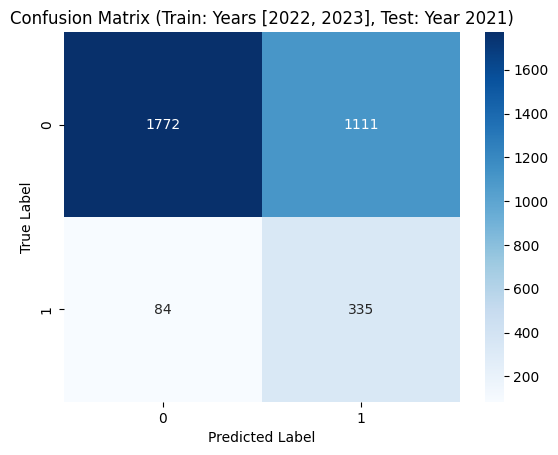


Overall Metrics:
Overall Accuracy: 0.7619
Overall Precision: 0.8458
Overall Recall: 0.7619
Overall F1-Score: 0.7854


In [178]:
model_report(data_train,data_test,svm_model)